tensorboard

In [ ]:
# !pip install tensorflow

In [3]:
from datetime import datetime
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
import numpy as np

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name = "X")
y = tf.constant(housing.target.reshape(-1,1), dtype=tf.float32, name = "y")

XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT,X)),XT),y)

with tf.Session() as sess:
    theta_value = theta.eval()

n_epochs = 1000
learning_rate = 0.01

# X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")  # error!!
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1,1), dtype=tf.float32, name = "y")
theta = tf.Variable(tf.random_uniform([n+1, 1], -1.0, 1.0), name = "theta")
y_pred = tf.matmul(X,theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch",epoch,"MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()
    
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

Epoch 0 MSE = 2.02984e+06
Epoch 100 MSE = nan
Epoch 200 MSE = nan
Epoch 300 MSE = nan
Epoch 400 MSE = nan
Epoch 500 MSE = nan
Epoch 600 MSE = nan
Epoch 700 MSE = nan
Epoch 800 MSE = nan
Epoch 900 MSE = nan


In [4]:
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

※ Tensorboard 키는 방법
(virtual_envs1) C:\Users\nsa18\Python>tensorboard --logdir="./hands-on" --port 6006
TensorBoard 1.10.0 at http://DESKTOP-90GQC3G:6006 (Press CTRL+C to quit)

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[tb_hist])

# 프롬프트창에서만 실행됨..

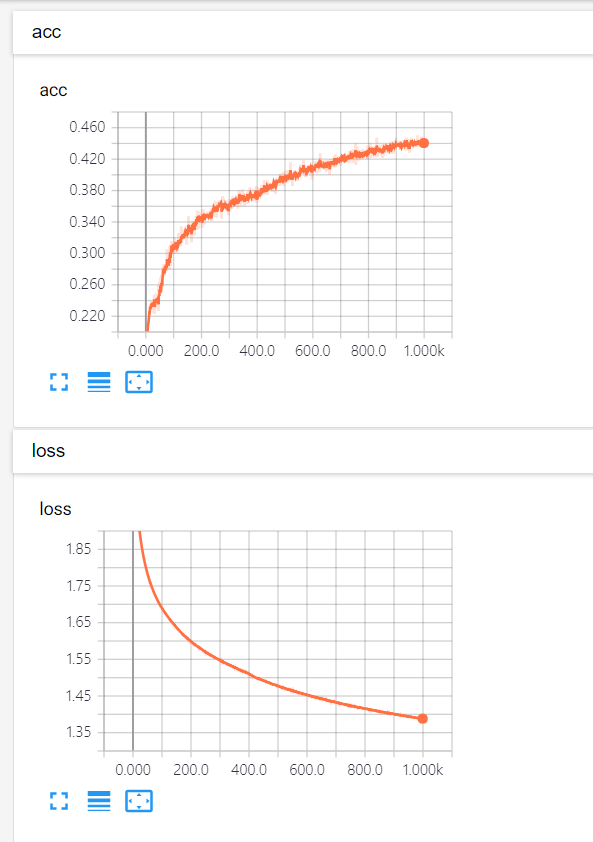

In [19]:
# XOR 게이트 tensorflow 하기
import tensorflow as tf

tf.reset_default_graph()
low_limit=-1
high_limit=1

X=tf.placeholder(tf.float32,[None,2])  # 입력 대기, None: 배치값을 모두 받을 수 있게
b1=tf.Variable(tf.random_uniform([2],low_limit,high_limit), name="b1") # tf.Variable: 변수생성, random_uniform: 랜덤한 값(low ~ high)으로 행렬 생성
W1=tf.Variable(tf.random_uniform([2,2],low_limit,high_limit), name="W1")
b2=tf.Variable(tf.random_uniform([1],low_limit,high_limit), name="b2")
W2=tf.Variable(tf.random_uniform([2,1],low_limit,high_limit), name="W2")

y=tf.placeholder(tf.float32,[4,1])
        
Z1=tf.matmul(X, W1) + b1  # matmul : dot(내적)
A1=tf.sigmoid(Z1)    
Z2=tf.matmul(A1,W2)+b2
yhat=tf.sigmoid(Z2)

cost = tf.reduce_mean(( (y * tf.log(yhat)) +  ((1 - y) * tf.log(1.0 - yhat)) ) * -1)    # cost function: cross-entropy
#     updates=tf.train.AdamOptimizer(0.01).minimize(cost)
updates=tf.train.GradientDescentOptimizer(0.01).minimize(cost)    # GradientDescent: 오차 역전파 해줌(learning_rate:0.01)

#     sess=tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True))
sess=tf.Session()
init = tf.global_variables_initializer()    
sess.run(init)

for i in range(100000):
    c, _ =sess.run([cost,updates], feed_dict={X:[[0,0],[1,0],[0,1],[1,1]], y: [[0],[1],[1],[0]]})  # feed_dict : placeholder에 값을 넣음
    if i%1000==0:
        print(c)

writer = tf.summary.FileWriter("./graph", sess.graph_def)

0.804956
0.689887
0.68885
0.687643
0.68609
0.684068
0.681403
0.677858
0.673108
0.66672
0.658138
0.646682
0.631564
0.611941
0.586985
0.556047
0.518953
0.476408
0.430222
0.383042
0.337594
0.295952
0.259206
0.227585
0.200769
0.178177
0.159162
0.143119
0.129518
0.117921
0.107968
0.0993696
0.091892
0.085348
0.0795865
0.0744847
0.0699427
0.0658789
0.0622256
0.058927
0.0559364
0.0532146
0.0507286
0.0484502
0.0463557
0.0444244
0.042639
0.0409835
0.0394454
0.0380127
0.0366754
0.0354244
0.0342521
0.0331515
0.0321167
0.0311411
0.0302205
0.0293511
0.0285281
0.0277486
0.0270081
0.0263052
0.0256369
0.0250002
0.024393
0.0238137
0.0232605
0.0227315
0.0222251
0.02174
0.0212749
0.0208285
0.0204003
0.0199892
0.0195931
0.0192124
0.0188455
0.0184923
0.0181515
0.0178226
0.017505
0.0171985
0.0169026
0.0166158
0.0163388
0.0160703
0.0158104
0.0155588
0.0153142
0.0150777
0.0148478
0.0146248
0.0144084
0.0141977
0.0139938
0.0137945
0.0136008
0.0134136
0.0132298
0.0130509


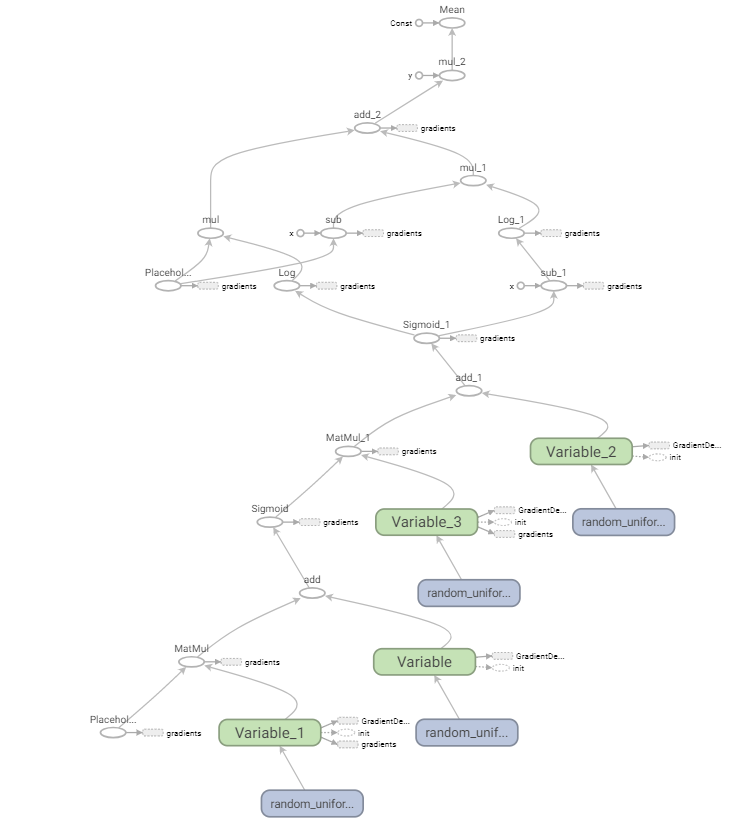

In [20]:
result=sess.run(yhat,feed_dict={X:[[0,0]]})
print(result,(0.5 > result)==True)
result=sess.run(yhat,feed_dict={X:[[1,0]]})
print(result,(0.5 > result)==False)
result=sess.run(yhat,feed_dict={X:[[0,1]]})
print(result,(0.5 > result)==False)
result=sess.run(yhat,feed_dict={X:[[1,1]]})
print(result,(0.5 > result)==True)
sess.close()

[[ 0.01249303]] [[ True]]
[[ 0.98318017]] [[ True]]
[[ 0.98870498]] [[ True]]
[[ 0.01056308]] [[ True]]


In [9]:
# basic ann
tf.reset_default_graph()
low_limit=-1
high_limit=1

X=tf.placeholder(tf.float32,[None,2])
b1=tf.Variable(tf.random_uniform([2],low_limit,high_limit), name="b1")
W1=tf.Variable(tf.random_uniform([2,2],low_limit,high_limit), name="W1")
Z1=tf.matmul(X, W1) + b1

# tensorflow 필수!
sess=tf.Session()
init = tf.global_variables_initializer()

# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True

with tf.Session(config=config) as sess:
    sess.run(init)

    c=sess.run([Z1], feed_dict={X:[[1,2]]})   # back-propergation 없음
    print(c)
    
writer = tf.summary.FileWriter("./graph", sess.graph)

[array([[ 2.14402008,  0.07266617]], dtype=float32)]
